In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Tuple
from scipy.optimize import fsolve
import ipywidgets as widgets
from IPython.display import display
from thermo_models.RaoultsLawModel import *
from distillation.DistillationModel import DistillationModel
from utils.AntoineEquation import * 
from IPython.display import clear_output
from tqdm import tqdm
from distillation.DistillationTernary import *
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive, Button, VBox, HBox, Output
from IPython.display import clear_output
from thermo_models.WilsonModel import *


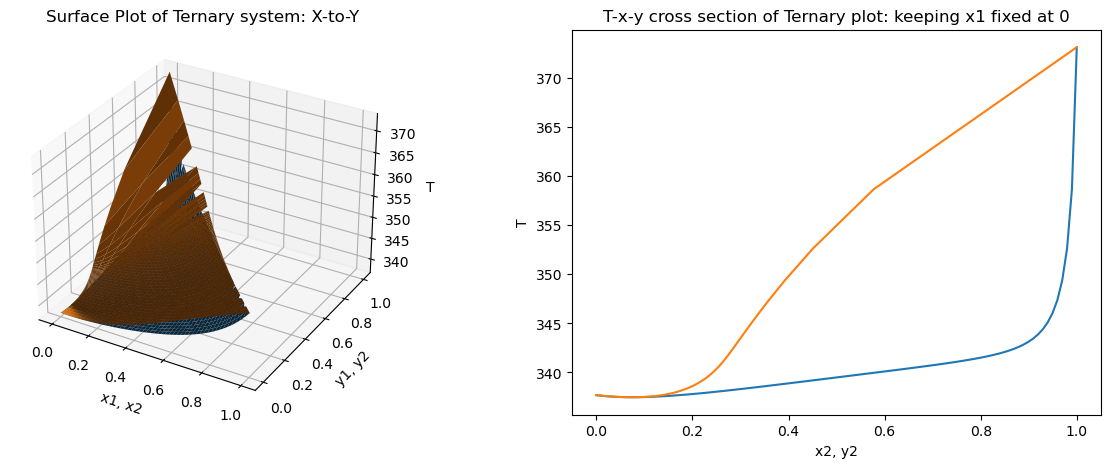

In [2]:
P_sys = 101325 #1 atm in pascals
num_comp = 3
Lambdas = {
    (1,1) : 1,
    (1,2) : 0.1782,
    (1,3) : 0.692,
    (2,1) : 0.8966,
    (2,2) : 1,
    (2,3) : 0.492,
    (3,1) : 0.726,
    (3,2) : 0.066,
    (3,3) : 1
    }

#Antoine parameters for Ethanol
EtOH_A = 23.5807
EtOH_B = 3673.81
EtOH_C = -46.681

#Antoine parameters for Water
H2O_A = 23.2256
H2O_B = 3835.18
H2O_C = -45.343

#Antoine parameters for Methanol
Me_A = 23.4832
Me_B = 3634.01
Me_C = -33.768

#Antoine Equations 
EtOH_antoine = AntoineEquationBaseE(EtOH_A, EtOH_B, EtOH_C)
H2O_antoine = AntoineEquationBaseE(H2O_A, H2O_B, H2O_C)
Methanol_antoine = AntoineEquationBaseE(Me_A, Me_B, Me_C)

# Create a Wilson's Model object
TernarySys = WilsonModel(num_comp,P_sys,Lambdas,[EtOH_antoine, H2O_antoine, Methanol_antoine])
TernarySys.plot_ternary_txy(100, keep_zero=0)

In [3]:
R1_slider =  widgets.FloatLogSlider(value=1.0, base=10, min=0, max=2, step=0.001,  description='Reflux Ratio:', readout_format='.1f')
go_button = widgets.Button(description='Create Model', width='15%', margin='0 10px 0 0')
out_oplines = Output()

def plot_rect_strip_ex2(R = R1_slider):
    plt.close('all')  # Ensure that any existing figures are closed before plotting a new one.
    xF = np.array([0.3, 0.3, 0.4])
    xD = np.array([0.990, 0.0100, 1e-10])
    xB = np.array([1e-5, 0.4261,0.5749])
    distillation_model = DistillationModelTernary(TernarySys, xF = xF, xD = xD, xB = xB, reflux = R)
    fig, ax = plt.subplots(1,1,figsize= (5,5))
    distillation_model.plot_rect_strip(ax)
    plt.show()

ternary_plot = interactive(plot_rect_strip_ex2, R=R1_slider, continuous_update=False)
def on_go_button_click(b):
    with out_oplines:
        clear_output(wait=True)
        plt.close('all')  # Close all open matplotlib plots
        plot_rect_strip_ex2( R=R1_slider.value)
        
go_button = Button(description='Generate Plot')
go_button.on_click(on_go_button_click)

layout = VBox([HBox(ternary_plot.children[:-1]), go_button, ternary_plot])
display(layout)